In [ ]:
!pip install tableone
!pip install datatable
!pip install missingno
from tqdm.notebook import tqdm 
import missingno as msno
import os

from sklearn.ensemble import RandomForestClassifier

# LR
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import pandas as pd
import numpy as np
from tableone import TableOne
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datatable
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
pd.options.display.max_columns = None

from IPython.display import display
import seaborn as sns
import imblearn

import scipy.stats as stats
from scipy.stats import zscore

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
datapath = '/content/gdrive/MyDrive/HE'

## Snuh
df_snuh = pd.read_csv(os.path.join(datapath,'210612_snuh_light.csv'))
## AMC
df_amc = pd.read_csv(os.path.join(datapath,'df_amc230215.csv'))
## EUMC
df_eumc = pd.read_csv(os.path.join(datapath,'210615_eumc_ane_map.csv'))
## BRMH
df_brmh = pd.read_csv(os.path.join(datapath,'210612_brmh_light.csv'))

df_snuh.drop(columns=["hoslos", "opdur","anedur","op_code","asa_1","asa_2","asa_3","asa_4","asa_5","asa_nan","iculos","icu1"],inplace=True)
df_eumc.drop(columns=["hoslos", "opdur","anedur","op_code","asa_1","asa_2","asa_3","asa_4","asa_5","asa_nan","iculos","icu1"],inplace=True)
df_brmh.drop(columns=["hoslos", "opdur","anedur","op_code","asa_1","asa_2","asa_3","asa_4","asa_5","asa_nan","iculos","icu1"],inplace=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mounted at /content/gdrive


In [ ]:
df_snuh['hosid']=1
df_amc['hosid']=2
df_eumc['hosid']=3
df_brmh['hosid']=4

In [ ]:
df_merge = pd.concat([df_snuh,df_amc,df_eumc,df_brmh])

In [ ]:
var_list = ['age','bmi','sex','emop','dept_DN','dept_GS','dept_OG','dept_OL','dept_OS','dept_PS','dept_UR','dept_nan','anetype_GA','anetype_NA','anetype_NB','anetype_nan','anetype_MAC','preop_pt','preop_aptt', 'preop_alb','preop_bun','preop_cr','preop_glu','preop_gpt','preop_got','preop_hb','preop_k','preop_na','preop_plt','preop_wbc','hosid']

In [ ]:
bootstraps = 50
datapoints= 1000
lins = np.round(np.linspace(0,1,datapoints),2)
fprnrec = np.linspace(0,1,1000)

In [ ]:
X_snuh = df_snuh[var_list]
X_amc = df_amc[var_list]
X_eumc = df_eumc[var_list]
X_brmh = df_brmh[var_list]
X_merge = df_merge[var_list]


## Missing Imputation
X_snuh.fillna(df_snuh.median(), inplace=True)
X_amc.fillna(df_amc.median(), inplace=True)
X_eumc.fillna(df_eumc.median(), inplace=True)
X_brmh.fillna(df_brmh.median(), inplace=True)
X_merge.fillna(df_merge.median(), inplace=True)
y_snuh = df_snuh['death30']
y_amc = df_amc['death30']
y_eumc = df_eumc['death30']
y_brmh = df_brmh['death30']
y_merge = df_merge['death30']

feature = X_snuh.columns

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [ ]:
sr5_snuh=5000/(len(df_snuh['caseid']))
sr5_amc=5000/(len(df_amc['caseid']))
sr5_eumc=5000/(len(df_eumc['caseid']))
sr5_brmh=5000/(len(df_brmh['caseid']))
sr10_snuh=10000/(len(df_snuh['caseid']))
sr10_amc=10000/(len(df_amc['caseid']))
sr10_eumc=10000/(len(df_eumc['caseid']))
sr10_brmh=10000/(len(df_brmh['caseid']))
sr15_snuh=15000/(len(df_snuh['caseid']))
sr15_amc=15000/(len(df_amc['caseid']))
sr15_eumc=15000/(len(df_eumc['caseid']))
sr15_brmh=15000/(len(df_brmh['caseid']))
sr20_snuh=20000/(len(df_snuh['caseid']))
sr20_amc=20000/(len(df_amc['caseid']))
sr20_eumc=20000/(len(df_eumc['caseid']))
sr20_brmh=20000/(len(df_brmh['caseid']))
sr25_snuh=25000/(len(df_snuh['caseid']))
sr25_amc=25000/(len(df_amc['caseid']))
sr25_eumc=25000/(len(df_eumc['caseid']))
sr25_brmh=25000/(len(df_brmh['caseid']))
sr30_snuh=30000/(len(df_snuh['caseid']))
sr30_amc=30000/(len(df_amc['caseid']))
sr30_eumc=30000/(len(df_eumc['caseid']))
sr30_brmh=30000/(len(df_brmh['caseid']))


In [ ]:
sampling_size = [5,10,15,20,25,30]
fprnrec = np.linspace(0,1,1000)

for k in sampling_size:
  globals()['auroc_table_sm{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_am{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_em{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_bm{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_sm{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_am{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_em{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_bm{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['roc_graphs_sm{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_am{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_em{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_bm{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_sm{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_am{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_em{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_bm{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['auroc_table_ss{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_as{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_es{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_bs{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ss{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_as{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_es{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_bs{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['roc_graphs_ss{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_as{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_es{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_bs{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ss{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_as{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_es{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_bs{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['auroc_table_sa{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_aa{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_ea{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_ba{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_sa{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_aa{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ea{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ba{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['roc_graphs_sa{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_aa{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_ea{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_ba{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_sa{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_aa{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ea{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ba{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['auroc_table_se{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_ae{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_ee{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_be{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_se{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ae{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ee{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_be{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['roc_graphs_se{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_ae{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_ee{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_be{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_se{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ae{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ee{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_be{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['auroc_table_sb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_ab{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_eb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auroc_table_bb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_sb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_ab{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_eb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['auprc_table_bb{}'.format(k)] = pd.DataFrame([], columns=(np.arange(0,bootstraps)+1))
  globals()['roc_graphs_sb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_ab{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_eb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['roc_graphs_bb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_sb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_ab{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_eb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))
  globals()['prc_graphs_bb{}'.format(k)] = pd.DataFrame([], columns=(fprnrec))

scaler = StandardScaler()
for l in tqdm(range(bootstraps)):
  for k in sampling_size:
    globals()['X_train_snuh_{}'.format(k)], globals()['X_test_snuh_{}'.format(k)], globals()['y_train_snuh_{}'.format(k)], globals()['y_test_snuh_{}'.format(k)] = train_test_split(X_snuh, y_snuh, test_size=(1-globals()['sr{}_snuh'.format(k)]), stratify=y_snuh,shuffle=True)
    globals()['X_train_amc_{}'.format(k)], globals()['X_test_amc_{}'.format(k)], globals()['y_train_amc_{}'.format(k)], globals()['y_test_amc_{}'.format(k)] = train_test_split(X_amc, y_amc, test_size=(1-globals()['sr{}_amc'.format(k)]), stratify=y_amc,shuffle=True)
    globals()['X_train_eumc_{}'.format(k)], globals()['X_test_eumc_{}'.format(k)], globals()['y_train_eumc_{}'.format(k)], globals()['y_test_eumc_{}'.format(k)] = train_test_split(X_eumc, y_eumc, test_size=(1-globals()['sr{}_eumc'.format(k)]), stratify=y_eumc,shuffle=True)
    globals()['X_train_brmh_{}'.format(k)], globals()['X_test_brmh_{}'.format(k)], globals()['y_train_brmh_{}'.format(k)], globals()['y_test_brmh_{}'.format(k)] = train_test_split(X_brmh, y_brmh, test_size=(1-globals()['sr{}_brmh'.format(k)]), stratify=y_brmh,shuffle=True)
    globals()['X_merge_{}'.format(k)]= pd.concat([globals()['X_train_snuh_{}'.format(k)],globals()['X_train_amc_{}'.format(k)],globals()['X_train_eumc_{}'.format(k)],globals()['X_train_brmh_{}'.format(k)]])
    globals()['y_merge_{}'.format(k)]= pd.concat([globals()['y_train_snuh_{}'.format(k)],globals()['y_train_amc_{}'.format(k)],globals()['y_train_eumc_{}'.format(k)],globals()['y_train_brmh_{}'.format(k)]])
#    globals()['feature{}'.format(k)] = globals()['X_merge_{}'.format(k)].columns
    globals()['X_train_{}'.format(k)], globals()['X_test_{}'.format(k)], globals()['y_train_{}'.format(k)], globals()['y_test_{}'.format(k)] = train_test_split(globals()['X_merge_{}'.format(k)], globals()['y_merge_{}'.format(k)], test_size=0.2, stratify=globals()['y_merge_{}'.format(k)],shuffle=True)
    scaler.fit(globals()['X_train_{}'.format(k)])
    globals()['X_train_{}'.format(k)] = pd.DataFrame(globals()['X_train_{}'.format(k)],columns=feature)
    globals()['y_train_{}'.format(k)] = pd.DataFrame(globals()['y_train_{}'.format(k)],columns=['death30'])
    scaler.fit(globals()['X_train_snuh_{}'.format(k)])
    globals()['X_train_snuh_{}'.format(k)] = pd.DataFrame(globals()['X_train_snuh_{}'.format(k)],columns=feature)
    globals()['y_train_snuh_{}'.format(k)] = pd.DataFrame(globals()['y_train_snuh_{}'.format(k)],columns=['death30'])
    scaler.fit(globals()['X_train_amc_{}'.format(k)])
    globals()['X_train_amc_{}'.format(k)] = pd.DataFrame(globals()['X_train_amc_{}'.format(k)],columns=feature)
    globals()['y_train_amc_{}'.format(k)] = pd.DataFrame(globals()['y_train_amc_{}'.format(k)],columns=['death30'])
    scaler.fit(globals()['X_train_eumc_{}'.format(k)])
    globals()['X_train_eumc_{}'.format(k)] = pd.DataFrame(globals()['X_train_eumc_{}'.format(k)],columns=feature)
    globals()['y_train_eumc_{}'.format(k)] = pd.DataFrame(globals()['y_train_eumc_{}'.format(k)],columns=['death30'])
    scaler.fit(globals()['X_train_brmh_{}'.format(k)])
    globals()['X_train_brmh_{}'.format(k)] = pd.DataFrame(globals()['X_train_brmh_{}'.format(k)],columns=feature)
    globals()['y_train_brmh_{}'.format(k)] = pd.DataFrame(globals()['y_train_brmh_{}'.format(k)],columns=['death30'])
    scaler.fit(globals()['X_test_{}'.format(k)])
    globals()['X_test_{}'.format(k)] = pd.DataFrame(globals()['X_test_{}'.format(k)],columns=feature)
    scaler.fit(globals()['X_test_snuh_{}'.format(k)])
    globals()['X_test_snuh_{}'.format(k)] = pd.DataFrame(globals()['X_test_snuh_{}'.format(k)],columns=feature)
    scaler.fit(globals()['X_test_amc_{}'.format(k)])
    globals()['X_test_amc_{}'.format(k)] = pd.DataFrame(globals()['X_test_amc_{}'.format(k)],columns=feature)
    scaler.fit(globals()['X_test_eumc_{}'.format(k)])
    globals()['X_test_eumc_{}'.format(k)] = pd.DataFrame(globals()['X_test_eumc_{}'.format(k)],columns=feature)
    scaler.fit(globals()['X_test_brmh_{}'.format(k)])
    globals()['X_test_brmh_{}'.format(k)] = pd.DataFrame(globals()['X_test_brmh_{}'.format(k)],columns=feature)

    globals()['merge_lr{}'.format(k)] = LogisticRegression(C=0.1, penalty='l2')
    globals()['merge_lr{}'.format(k)].fit(X=globals()['X_train_{}'.format(k)], y=globals()['y_train_{}'.format(k)])
    globals()['snuh_lr{}'.format(k)] = LogisticRegression(C=0.1, penalty='l2')
    globals()['snuh_lr{}'.format(k)].fit(X=globals()['X_train_snuh_{}'.format(k)], y=globals()['y_train_snuh_{}'.format(k)])
    globals()['amc_lr{}'.format(k)] = LogisticRegression(C=0.1, penalty='l2')
    globals()['amc_lr{}'.format(k)].fit(X=globals()['X_train_amc_{}'.format(k)], y=globals()['y_train_amc_{}'.format(k)])
    globals()['eumc_lr{}'.format(k)] = LogisticRegression(C=0.1, penalty='l2')
    globals()['eumc_lr{}'.format(k)].fit(X=globals()['X_train_eumc_{}'.format(k)], y=globals()['y_train_eumc_{}'.format(k)])
    globals()['brmh_lr{}'.format(k)] = LogisticRegression(C=0.1, penalty='l2')
    globals()['brmh_lr{}'.format(k)].fit(X=globals()['X_train_brmh_{}'.format(k)], y=globals()['y_train_brmh_{}'.format(k)])
    globals()['y_test_snuh_proba_m{}'.format(k)] = globals()['merge_lr{}'.format(k)].predict_proba(globals()['X_test_snuh_{}'.format(k)])
    globals()['y_test_amc_proba_m{}'.format(k)] = globals()['merge_lr{}'.format(k)].predict_proba(globals()['X_test_amc_{}'.format(k)])
    globals()['y_test_eumc_proba_m{}'.format(k)] = globals()['merge_lr{}'.format(k)].predict_proba(globals()['X_test_eumc_{}'.format(k)])
    globals()['y_test_brmh_proba_m{}'.format(k)] = globals()['merge_lr{}'.format(k)].predict_proba(globals()['X_test_brmh_{}'.format(k)])
    globals()['y_test_snuh_proba_s{}'.format(k)] = globals()['snuh_lr{}'.format(k)].predict_proba(globals()['X_test_snuh_{}'.format(k)])
    globals()['y_test_amc_proba_s{}'.format(k)] = globals()['snuh_lr{}'.format(k)].predict_proba(globals()['X_test_amc_{}'.format(k)])
    globals()['y_test_eumc_proba_s{}'.format(k)] = globals()['snuh_lr{}'.format(k)].predict_proba(globals()['X_test_eumc_{}'.format(k)])
    globals()['y_test_brmh_proba_s{}'.format(k)] = globals()['snuh_lr{}'.format(k)].predict_proba(globals()['X_test_brmh_{}'.format(k)])
    globals()['y_test_snuh_proba_a{}'.format(k)] = globals()['amc_lr{}'.format(k)].predict_proba(globals()['X_test_snuh_{}'.format(k)])
    globals()['y_test_amc_proba_a{}'.format(k)] = globals()['amc_lr{}'.format(k)].predict_proba(globals()['X_test_amc_{}'.format(k)])
    globals()['y_test_eumc_proba_a{}'.format(k)] = globals()['amc_lr{}'.format(k)].predict_proba(globals()['X_test_eumc_{}'.format(k)])
    globals()['y_test_brmh_proba_a{}'.format(k)] = globals()['amc_lr{}'.format(k)].predict_proba(globals()['X_test_brmh_{}'.format(k)])
    globals()['y_test_snuh_proba_e{}'.format(k)] = globals()['eumc_lr{}'.format(k)].predict_proba(globals()['X_test_snuh_{}'.format(k)])
    globals()['y_test_amc_proba_e{}'.format(k)] = globals()['eumc_lr{}'.format(k)].predict_proba(globals()['X_test_amc_{}'.format(k)])
    globals()['y_test_eumc_proba_e{}'.format(k)] = globals()['eumc_lr{}'.format(k)].predict_proba(globals()['X_test_eumc_{}'.format(k)])
    globals()['y_test_brmh_proba_e{}'.format(k)] = globals()['eumc_lr{}'.format(k)].predict_proba(globals()['X_test_brmh_{}'.format(k)])
    globals()['y_test_snuh_proba_b{}'.format(k)] = globals()['brmh_lr{}'.format(k)].predict_proba(globals()['X_test_snuh_{}'.format(k)])
    globals()['y_test_amc_proba_b{}'.format(k)] = globals()['brmh_lr{}'.format(k)].predict_proba(globals()['X_test_amc_{}'.format(k)])
    globals()['y_test_eumc_proba_b{}'.format(k)] = globals()['brmh_lr{}'.format(k)].predict_proba(globals()['X_test_eumc_{}'.format(k)])
    globals()['y_test_brmh_proba_b{}'.format(k)] = globals()['brmh_lr{}'.format(k)].predict_proba(globals()['X_test_brmh_{}'.format(k)])
    globals()['fpr_snuh_m{}'.format(k)], globals()['tpr_snuh_m{}'.format(k)], _ = roc_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['fpr_amc_m{}'.format(k)], globals()['tpr_amc_m{}'.format(k)], _ = roc_curve(globals()['y_test_amc_{}'.format(k)],globals()['y_test_amc_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['fpr_eumc_m{}'.format(k)], globals()['tpr_eumc_m{}'.format(k)], _ = roc_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['fpr_brmh_m{}'.format(k)], globals()['tpr_brmh_m{}'.format(k)], _ = roc_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['fpr_snuh_s{}'.format(k)], globals()['tpr_snuh_s{}'.format(k)], _ = roc_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['fpr_amc_s{}'.format(k)], globals()['tpr_amc_s{}'.format(k)], _ = roc_curve(globals()['y_test_amc_{}'.format(k)],globals()['y_test_amc_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['fpr_eumc_s{}'.format(k)], globals()['tpr_eumc_s{}'.format(k)], _ = roc_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['fpr_brmh_s{}'.format(k)], globals()['tpr_brmh_s{}'.format(k)], _ = roc_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['fpr_snuh_a{}'.format(k)], globals()['tpr_snuh_a{}'.format(k)], _ = roc_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['fpr_amc_a{}'.format(k)], globals()['tpr_amc_a{}'.format(k)], _ = roc_curve(globals()['y_test_amc_{}'.format(k)],globals()['y_test_amc_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['fpr_eumc_a{}'.format(k)], globals()['tpr_eumc_a{}'.format(k)], _ = roc_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['fpr_brmh_a{}'.format(k)], globals()['tpr_brmh_a{}'.format(k)], _ = roc_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['fpr_snuh_e{}'.format(k)], globals()['tpr_snuh_e{}'.format(k)], _ = roc_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['fpr_amc_e{}'.format(k)], globals()['tpr_amc_e{}'.format(k)], _ = roc_curve(globals()['y_test_amc_{}'.format(k)],globals()['y_test_amc_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['fpr_eumc_e{}'.format(k)], globals()['tpr_eumc_e{}'.format(k)], _ = roc_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['fpr_brmh_e{}'.format(k)], globals()['tpr_brmh_e{}'.format(k)], _ = roc_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['fpr_snuh_b{}'.format(k)], globals()['tpr_snuh_b{}'.format(k)], _ = roc_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['fpr_amc_b{}'.format(k)], globals()['tpr_amc_b{}'.format(k)], _ = roc_curve(globals()['y_test_amc_{}'.format(k)],globals()['y_test_amc_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['fpr_eumc_b{}'.format(k)], globals()['tpr_eumc_b{}'.format(k)], _ = roc_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['fpr_brmh_b{}'.format(k)], globals()['tpr_brmh_b{}'.format(k)], _ = roc_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['prec_snuh_m{}'.format(k)], globals()['recall_snuh_m{}'.format(k)], _ = precision_recall_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['prec_amc_m{}'.format(k)], globals()['recall_amc_m{}'.format(k)], _ = precision_recall_curve(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['prec_eumc_m{}'.format(k)], globals()['recall_eumc_m{}'.format(k)], _ = precision_recall_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['prec_brmh_m{}'.format(k)], globals()['recall_brmh_m{}'.format(k)], _ = precision_recall_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_m{}'.format(k)][:, 1], pos_label=globals()['merge_lr{}'.format(k)].classes_[1])
    globals()['prec_snuh_s{}'.format(k)], globals()['recall_snuh_s{}'.format(k)], _ = precision_recall_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['prec_amc_s{}'.format(k)], globals()['recall_amc_s{}'.format(k)], _ = precision_recall_curve(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['prec_eumc_s{}'.format(k)], globals()['recall_eumc_s{}'.format(k)], _ = precision_recall_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['prec_brmh_s{}'.format(k)], globals()['recall_brmh_s{}'.format(k)], _ = precision_recall_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_s{}'.format(k)][:, 1], pos_label=globals()['snuh_lr{}'.format(k)].classes_[1])
    globals()['prec_snuh_a{}'.format(k)], globals()['recall_snuh_a{}'.format(k)], _ = precision_recall_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['prec_amc_a{}'.format(k)], globals()['recall_amc_a{}'.format(k)], _ = precision_recall_curve(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['prec_eumc_a{}'.format(k)], globals()['recall_eumc_a{}'.format(k)], _ = precision_recall_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['prec_brmh_a{}'.format(k)], globals()['recall_brmh_a{}'.format(k)], _ = precision_recall_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_a{}'.format(k)][:, 1], pos_label=globals()['amc_lr{}'.format(k)].classes_[1])
    globals()['prec_snuh_e{}'.format(k)], globals()['recall_snuh_e{}'.format(k)], _ = precision_recall_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['prec_amc_e{}'.format(k)], globals()['recall_amc_e{}'.format(k)], _ = precision_recall_curve(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['prec_eumc_e{}'.format(k)], globals()['recall_eumc_e{}'.format(k)], _ = precision_recall_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['prec_brmh_e{}'.format(k)], globals()['recall_brmh_e{}'.format(k)], _ = precision_recall_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_e{}'.format(k)][:, 1], pos_label=globals()['eumc_lr{}'.format(k)].classes_[1])
    globals()['prec_snuh_b{}'.format(k)], globals()['recall_snuh_b{}'.format(k)], _ = precision_recall_curve(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['prec_amc_b{}'.format(k)], globals()['recall_amc_b{}'.format(k)], _ = precision_recall_curve(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['prec_eumc_b{}'.format(k)], globals()['recall_eumc_b{}'.format(k)], _ = precision_recall_curve(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['prec_brmh_b{}'.format(k)], globals()['recall_brmh_b{}'.format(k)], _ = precision_recall_curve(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_b{}'.format(k)][:, 1], pos_label=globals()['brmh_lr{}'.format(k)].classes_[1])
    globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k) , l+1] = roc_auc_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_m{}'.format(k)][:, 1])
    globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k) , l+1] = roc_auc_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_m{}'.format(k)][:, 1])
    globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k) , l+1] = roc_auc_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_m{}'.format(k)][:, 1])
    globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k) , l+1] = roc_auc_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_m{}'.format(k)][:, 1])
    globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k) , l+1] = roc_auc_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_s{}'.format(k)][:, 1])
    globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k) , l+1] = roc_auc_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_s{}'.format(k)][:, 1])
    globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k) , l+1] = roc_auc_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_s{}'.format(k)][:, 1])
    globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k) , l+1] = roc_auc_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_s{}'.format(k)][:, 1])
    globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_a{}'.format(k)][:, 1])
    globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_a{}'.format(k)][:, 1])
    globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_a{}'.format(k)][:, 1])
    globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_a{}'.format(k)][:, 1])
    globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_e{}'.format(k)][:, 1])
    globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_e{}'.format(k)][:, 1])
    globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_e{}'.format(k)][:, 1])
    globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k) , l+1] = roc_auc_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_e{}'.format(k)][:, 1])
    globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k) , l+1] = roc_auc_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_b{}'.format(k)][:, 1])
    globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k) , l+1] = roc_auc_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_b{}'.format(k)][:, 1])
    globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k) , l+1] = roc_auc_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_b{}'.format(k)][:, 1])
    globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k) , l+1] = roc_auc_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_b{}'.format(k)][:, 1])
    globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k) , l+1] = average_precision_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_m{}'.format(k)][:, 1])
    globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k) , l+1] = average_precision_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_m{}'.format(k)][:, 1])
    globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k) , l+1] = average_precision_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_m{}'.format(k)][:, 1])
    globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k) , l+1] = average_precision_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_m{}'.format(k)][:, 1])
    globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k) , l+1] = average_precision_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_s{}'.format(k)][:, 1])
    globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k) , l+1] = average_precision_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_s{}'.format(k)][:, 1])
    globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k) , l+1] = average_precision_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_s{}'.format(k)][:, 1])
    globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k) , l+1] = average_precision_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_s{}'.format(k)][:, 1])
    globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k) , l+1] = average_precision_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_a{}'.format(k)][:, 1])
    globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k) , l+1] = average_precision_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_a{}'.format(k)][:, 1])
    globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k) , l+1] = average_precision_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_a{}'.format(k)][:, 1])
    globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k) , l+1] = average_precision_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_a{}'.format(k)][:, 1])
    globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k) , l+1] = average_precision_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_e{}'.format(k)][:, 1])
    globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k) , l+1] = average_precision_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_e{}'.format(k)][:, 1])
    globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k) , l+1] = average_precision_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_e{}'.format(k)][:, 1])
    globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k) , l+1] = average_precision_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_e{}'.format(k)][:, 1])
    globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k) , l+1] = average_precision_score(globals()['y_test_snuh_{}'.format(k)], globals()['y_test_snuh_proba_b{}'.format(k)][:, 1])
    globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k) , l+1] = average_precision_score(globals()['y_test_amc_{}'.format(k)], globals()['y_test_amc_proba_b{}'.format(k)][:, 1])
    globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k) , l+1] = average_precision_score(globals()['y_test_eumc_{}'.format(k)], globals()['y_test_eumc_proba_b{}'.format(k)][:, 1])
    globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k) , l+1] = average_precision_score(globals()['y_test_brmh_{}'.format(k)], globals()['y_test_brmh_proba_b{}'.format(k)][:, 1])
    globals()['roc_graphs_sm{}'.format(k)].loc[f'{l}_SNUH on MERG'+str(k),:] = np.interp(fprnrec, globals()['fpr_snuh_m{}'.format(k)], globals()['tpr_snuh_m{}'.format(k)])
    globals()['roc_graphs_am{}'.format(k)].loc[f'{l}_AMC on MERG'+str(k),:] = np.interp(fprnrec, globals()['fpr_amc_m{}'.format(k)], globals()['tpr_amc_m{}'.format(k)])
    globals()['roc_graphs_em{}'.format(k)].loc[f'{l}_EUMC on MERG'+str(k),:] = np.interp(fprnrec, globals()['fpr_eumc_m{}'.format(k)], globals()['tpr_eumc_m{}'.format(k)])
    globals()['roc_graphs_bm{}'.format(k)].loc[f'{l}_BRMH on MERG'+str(k),:] = np.interp(fprnrec, globals()['fpr_brmh_m{}'.format(k)], globals()['tpr_brmh_m{}'.format(k)])
    globals()['roc_graphs_ss{}'.format(k)].loc[f'{l}_SNUH on SNUH'+str(k),:] = np.interp(fprnrec, globals()['fpr_snuh_s{}'.format(k)], globals()['tpr_snuh_s{}'.format(k)])
    globals()['roc_graphs_as{}'.format(k)].loc[f'{l}_AMC on SNUH'+str(k),:] = np.interp(fprnrec, globals()['fpr_amc_s{}'.format(k)], globals()['tpr_amc_s{}'.format(k)])
    globals()['roc_graphs_es{}'.format(k)].loc[f'{l}_EUMC on SNUH'+str(k),:] = np.interp(fprnrec, globals()['fpr_eumc_s{}'.format(k)], globals()['tpr_eumc_s{}'.format(k)])
    globals()['roc_graphs_bs{}'.format(k)].loc[f'{l}_BRMH on SNUH'+str(k),:] = np.interp(fprnrec, globals()['fpr_brmh_s{}'.format(k)], globals()['tpr_brmh_s{}'.format(k)])
    globals()['roc_graphs_sa{}'.format(k)].loc[f'{l}_SNUH on AMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_snuh_a{}'.format(k)], globals()['tpr_snuh_a{}'.format(k)])
    globals()['roc_graphs_aa{}'.format(k)].loc[f'{l}_AMC on AMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_amc_a{}'.format(k)], globals()['tpr_amc_a{}'.format(k)])
    globals()['roc_graphs_ea{}'.format(k)].loc[f'{l}_EUMC on AMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_eumc_a{}'.format(k)], globals()['tpr_eumc_a{}'.format(k)])
    globals()['roc_graphs_ba{}'.format(k)].loc[f'{l}_BRMH on AMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_brmh_a{}'.format(k)], globals()['tpr_brmh_a{}'.format(k)])
    globals()['roc_graphs_se{}'.format(k)].loc[f'{l}_SNUH on EUMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_snuh_e{}'.format(k)], globals()['tpr_snuh_e{}'.format(k)])
    globals()['roc_graphs_ae{}'.format(k)].loc[f'{l}_AMC on EUMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_amc_e{}'.format(k)], globals()['tpr_amc_e{}'.format(k)])
    globals()['roc_graphs_ee{}'.format(k)].loc[f'{l}_EUMC on EUMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_eumc_e{}'.format(k)], globals()['tpr_eumc_e{}'.format(k)])
    globals()['roc_graphs_be{}'.format(k)].loc[f'{l}_BRMH on EUMC'+str(k),:] = np.interp(fprnrec, globals()['fpr_brmh_e{}'.format(k)], globals()['tpr_brmh_e{}'.format(k)])
    globals()['roc_graphs_sb{}'.format(k)].loc[f'{l}_SNUH on BRMH'+str(k),:] = np.interp(fprnrec, globals()['fpr_snuh_b{}'.format(k)], globals()['tpr_snuh_b{}'.format(k)])
    globals()['roc_graphs_ab{}'.format(k)].loc[f'{l}_AMC on BRMH'+str(k),:] = np.interp(fprnrec, globals()['fpr_amc_b{}'.format(k)], globals()['tpr_amc_b{}'.format(k)])
    globals()['roc_graphs_eb{}'.format(k)].loc[f'{l}_EUMC on BRMH'+str(k),:] = np.interp(fprnrec, globals()['fpr_eumc_b{}'.format(k)], globals()['tpr_eumc_b{}'.format(k)])
    globals()['roc_graphs_bb{}'.format(k)].loc[f'{l}_BRMH on BRMH'+str(k),:] = np.interp(fprnrec, globals()['fpr_brmh_b{}'.format(k)], globals()['tpr_brmh_b{}'.format(k)])
    globals()['prc_graphs_sm{}'.format(k)].loc[f'{l}_SNUH on MERG'+str(k),:] = np.interp(fprnrec, globals()['prec_snuh_m{}'.format(k)], globals()['recall_snuh_m{}'.format(k)])
    globals()['prc_graphs_am{}'.format(k)].loc[f'{l}_AMC on MERG'+str(k),:] = np.interp(fprnrec, globals()['prec_amc_m{}'.format(k)], globals()['recall_amc_m{}'.format(k)])
    globals()['prc_graphs_em{}'.format(k)].loc[f'{l}_EUMC on MERG'+str(k),:] = np.interp(fprnrec, globals()['prec_eumc_m{}'.format(k)], globals()['recall_eumc_m{}'.format(k)])
    globals()['prc_graphs_bm{}'.format(k)].loc[f'{l}_BRMH on MERG'+str(k),:] = np.interp(fprnrec, globals()['prec_brmh_m{}'.format(k)], globals()['recall_brmh_m{}'.format(k)])
    globals()['prc_graphs_ss{}'.format(k)].loc[f'{l}_SNUH on SNUH'+str(k),:] = np.interp(fprnrec, globals()['prec_snuh_s{}'.format(k)], globals()['recall_snuh_s{}'.format(k)])
    globals()['prc_graphs_as{}'.format(k)].loc[f'{l}_AMC on SNUH'+str(k),:] = np.interp(fprnrec, globals()['prec_amc_s{}'.format(k)], globals()['recall_amc_s{}'.format(k)])
    globals()['prc_graphs_es{}'.format(k)].loc[f'{l}_EUMC on SNUH'+str(k),:] = np.interp(fprnrec, globals()['prec_eumc_s{}'.format(k)], globals()['recall_eumc_s{}'.format(k)])
    globals()['prc_graphs_bs{}'.format(k)].loc[f'{l}_BRMH on SNUH'+str(k),:] = np.interp(fprnrec, globals()['prec_brmh_s{}'.format(k)], globals()['recall_brmh_s{}'.format(k)])
    globals()['prc_graphs_sa{}'.format(k)].loc[f'{l}_SNUH on AMC'+str(k),:] = np.interp(fprnrec, globals()['prec_snuh_a{}'.format(k)], globals()['recall_snuh_a{}'.format(k)])
    globals()['prc_graphs_aa{}'.format(k)].loc[f'{l}_AMC on AMC'+str(k),:] = np.interp(fprnrec, globals()['prec_amc_a{}'.format(k)], globals()['recall_amc_a{}'.format(k)])
    globals()['prc_graphs_ea{}'.format(k)].loc[f'{l}_EUMC on AMC'+str(k),:] = np.interp(fprnrec, globals()['prec_eumc_a{}'.format(k)], globals()['recall_eumc_a{}'.format(k)])
    globals()['prc_graphs_ba{}'.format(k)].loc[f'{l}_BRMH on AMC'+str(k),:] = np.interp(fprnrec, globals()['prec_brmh_a{}'.format(k)], globals()['recall_brmh_a{}'.format(k)])
    globals()['prc_graphs_se{}'.format(k)].loc[f'{l}_SNUH on EUMC'+str(k),:] = np.interp(fprnrec, globals()['prec_snuh_e{}'.format(k)], globals()['recall_snuh_e{}'.format(k)])
    globals()['prc_graphs_ae{}'.format(k)].loc[f'{l}_AMC on EUMC'+str(k),:] = np.interp(fprnrec, globals()['prec_amc_e{}'.format(k)], globals()['recall_amc_e{}'.format(k)])
    globals()['prc_graphs_ee{}'.format(k)].loc[f'{l}_EUMC on EUMC'+str(k),:] = np.interp(fprnrec, globals()['prec_eumc_e{}'.format(k)], globals()['recall_eumc_e{}'.format(k)])
    globals()['prc_graphs_be{}'.format(k)].loc[f'{l}_BRMH on EUMC'+str(k),:] = np.interp(fprnrec, globals()['prec_brmh_e{}'.format(k)], globals()['recall_brmh_e{}'.format(k)])
    globals()['prc_graphs_sb{}'.format(k)].loc[f'{l}_SNUH on BRMH'+str(k),:] = np.interp(fprnrec, globals()['prec_snuh_b{}'.format(k)], globals()['recall_snuh_b{}'.format(k)])
    globals()['prc_graphs_ab{}'.format(k)].loc[f'{l}_AMC on BRMH'+str(k),:] = np.interp(fprnrec, globals()['prec_amc_b{}'.format(k)], globals()['recall_amc_b{}'.format(k)])
    globals()['prc_graphs_eb{}'.format(k)].loc[f'{l}_EUMC on BRMH'+str(k),:] = np.interp(fprnrec, globals()['prec_eumc_b{}'.format(k)], globals()['recall_eumc_b{}'.format(k)])
    globals()['prc_graphs_bb{}'.format(k)].loc[f'{l}_BRMH on BRMH'+str(k),:] = np.interp(fprnrec, globals()['prec_brmh_b{}'.format(k)], globals()['recall_brmh_b{}'.format(k)])
    globals()['auc_mean_sm{}'.format(k)] = np.round(globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)].values.mean(),4)
    globals()['auc_std_sm{}'.format(k)] = np.round(globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)].values.std(),4)
    globals()['auc_ci_sm{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)])-1, loc=np.mean(globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)]), scale=stats.sem(globals()['auroc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)]))
    globals()['aucs_cid_sm{}'.format(k)] = np.round(globals()['auc_mean_sm{}'.format(k)] - globals()['auc_ci_sm{}'.format(k)][0],4)
    globals()['auc_mean_am{}'.format(k)] = np.round(globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)].values.mean(),4)
    globals()['auc_std_am{}'.format(k)] = np.round(globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)].values.std(),4)
    globals()['auc_ci_am{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)])-1, loc=np.mean(globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)]), scale=stats.sem(globals()['auroc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)]))
    globals()['aucs_cid_am{}'.format(k)] = np.round(globals()['auc_mean_am{}'.format(k)] - globals()['auc_ci_am{}'.format(k)][0],4)
    globals()['auc_mean_em{}'.format(k)] = np.round(globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)].values.mean(),4)
    globals()['auc_std_em{}'.format(k)] = np.round(globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)].values.std(),4)
    globals()['auc_ci_em{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)])-1, loc=np.mean(globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)]), scale=stats.sem(globals()['auroc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)]))
    globals()['aucs_cid_em{}'.format(k)] = np.round(globals()['auc_mean_em{}'.format(k)] - globals()['auc_ci_em{}'.format(k)][0],4)
    globals()['auc_mean_bm{}'.format(k)] = np.round(globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)].values.mean(),4)
    globals()['auc_std_bm{}'.format(k)] = np.round(globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)].values.std(),4)
    globals()['auc_ci_bm{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)])-1, loc=np.mean(globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)]), scale=stats.sem(globals()['auroc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)]))
    globals()['aucs_cid_bm{}'.format(k)] = np.round(globals()['auc_mean_bm{}'.format(k)] - globals()['auc_ci_bm{}'.format(k)][0],4)
    globals()['prc_mean_sm{}'.format(k)] = np.round(globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)].values.mean(),4)
    globals()['prc_std_sm{}'.format(k)] = np.round(globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)].values.std(),4)
    globals()['prc_ci_sm{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)])-1, loc=np.mean(globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)]), scale=stats.sem(globals()['auprc_table_sm{}'.format(k)].loc[ 'SNUH on MERG'+str(k)]))
    globals()['prcs_cid_sm{}'.format(k)] = np.round(globals()['prc_mean_sm{}'.format(k)] - globals()['prc_ci_sm{}'.format(k)][0],4)
    globals()['prc_mean_am{}'.format(k)] = np.round(globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)].values.mean(),4)
    globals()['prc_std_am{}'.format(k)] = np.round(globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)].values.std(),4)
    globals()['prc_ci_am{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)])-1, loc=np.mean(globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)]), scale=stats.sem(globals()['auprc_table_am{}'.format(k)].loc[ 'AMC on MERG'+str(k)]))
    globals()['prcs_cid_am{}'.format(k)] = np.round(globals()['prc_mean_am{}'.format(k)] - globals()['prc_ci_am{}'.format(k)][0],4)
    globals()['prc_mean_em{}'.format(k)] = np.round(globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)].values.mean(),4)
    globals()['prc_std_em{}'.format(k)] = np.round(globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)].values.std(),4)
    globals()['prc_ci_em{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)])-1, loc=np.mean(globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)]), scale=stats.sem(globals()['auprc_table_em{}'.format(k)].loc[ 'EUMC on MERG'+str(k)]))
    globals()['prcs_cid_em{}'.format(k)] = np.round(globals()['prc_mean_em{}'.format(k)] - globals()['prc_ci_em{}'.format(k)][0],4)
    globals()['prc_mean_bm{}'.format(k)] = np.round(globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)].values.mean(),4)
    globals()['prc_std_bm{}'.format(k)] = np.round(globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)].values.std(),4)
    globals()['prc_ci_bm{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)])-1, loc=np.mean(globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)]), scale=stats.sem(globals()['auprc_table_bm{}'.format(k)].loc[ 'BRMH on MERG'+str(k)]))
    globals()['prcs_cid_bm{}'.format(k)] = np.round(globals()['prc_mean_bm{}'.format(k)] - globals()['prc_ci_bm{}'.format(k)][0],4)
    globals()['auc_mean_ss{}'.format(k)] = np.round(globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)].values.mean(),4)
    globals()['auc_std_ss{}'.format(k)] = np.round(globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)].values.std(),4)
    globals()['auc_ci_ss{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)])-1, loc=np.mean(globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)]), scale=stats.sem(globals()['auroc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)]))
    globals()['aucs_cid_ss{}'.format(k)] = np.round(globals()['auc_mean_ss{}'.format(k)] - globals()['auc_ci_ss{}'.format(k)][0],4)
    globals()['auc_mean_as{}'.format(k)] = np.round(globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)].values.mean(),4)
    globals()['auc_std_as{}'.format(k)] = np.round(globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)].values.std(),4)
    globals()['auc_ci_as{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)])-1, loc=np.mean(globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)]), scale=stats.sem(globals()['auroc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)]))
    globals()['aucs_cid_as{}'.format(k)] = np.round(globals()['auc_mean_as{}'.format(k)] - globals()['auc_ci_as{}'.format(k)][0],4)
    globals()['auc_mean_es{}'.format(k)] = np.round(globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)].values.mean(),4)
    globals()['auc_std_es{}'.format(k)] = np.round(globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)].values.std(),4)
    globals()['auc_ci_es{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)])-1, loc=np.mean(globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)]), scale=stats.sem(globals()['auroc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)]))
    globals()['aucs_cid_es{}'.format(k)] = np.round(globals()['auc_mean_es{}'.format(k)] - globals()['auc_ci_es{}'.format(k)][0],4)
    globals()['auc_mean_bs{}'.format(k)] = np.round(globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)].values.mean(),4)
    globals()['auc_std_bs{}'.format(k)] = np.round(globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)].values.std(),4)
    globals()['auc_ci_bs{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)])-1, loc=np.mean(globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)]), scale=stats.sem(globals()['auroc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)]))
    globals()['aucs_cid_bs{}'.format(k)] = np.round(globals()['auc_mean_bs{}'.format(k)] - globals()['auc_ci_bs{}'.format(k)][0],4)
    globals()['prc_mean_ss{}'.format(k)] = np.round(globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)].values.mean(),4)
    globals()['prc_std_ss{}'.format(k)] = np.round(globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)].values.std(),4)
    globals()['prc_ci_ss{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)])-1, loc=np.mean(globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)]), scale=stats.sem(globals()['auprc_table_ss{}'.format(k)].loc[ 'SNUH on SNUH'+str(k)]))
    globals()['prcs_cid_ss{}'.format(k)] = np.round(globals()['prc_mean_ss{}'.format(k)] - globals()['prc_ci_ss{}'.format(k)][0],4)
    globals()['prc_mean_as{}'.format(k)] = np.round(globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)].values.mean(),4)
    globals()['prc_std_as{}'.format(k)] = np.round(globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)].values.std(),4)
    globals()['prc_ci_as{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)])-1, loc=np.mean(globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)]), scale=stats.sem(globals()['auprc_table_as{}'.format(k)].loc[ 'AMC on SNUH'+str(k)]))
    globals()['prcs_cid_as{}'.format(k)] = np.round(globals()['prc_mean_as{}'.format(k)] - globals()['prc_ci_as{}'.format(k)][0],4)
    globals()['prc_mean_es{}'.format(k)] = np.round(globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)].values.mean(),4)
    globals()['prc_std_es{}'.format(k)] = np.round(globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)].values.std(),4)
    globals()['prc_ci_es{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)])-1, loc=np.mean(globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)]), scale=stats.sem(globals()['auprc_table_es{}'.format(k)].loc[ 'EUMC on SNUH'+str(k)]))
    globals()['prcs_cid_es{}'.format(k)] = np.round(globals()['prc_mean_es{}'.format(k)] - globals()['prc_ci_es{}'.format(k)][0],4)
    globals()['prc_mean_bs{}'.format(k)] = np.round(globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)].values.mean(),4)
    globals()['prc_std_bs{}'.format(k)] = np.round(globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)].values.std(),4)
    globals()['prc_ci_bs{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)])-1, loc=np.mean(globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)]), scale=stats.sem(globals()['auprc_table_bs{}'.format(k)].loc[ 'BRMH on SNUH'+str(k)]))
    globals()['prcs_cid_bs{}'.format(k)] = np.round(globals()['prc_mean_bs{}'.format(k)] - globals()['prc_ci_bs{}'.format(k)][0],4)
    globals()['auc_mean_sa{}'.format(k)] = np.round(globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)].values.mean(),4)
    globals()['auc_std_sa{}'.format(k)] = np.round(globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)].values.std(),4)
    globals()['auc_ci_sa{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)]), scale=stats.sem(globals()['auroc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)]))
    globals()['aucs_cid_sa{}'.format(k)] = np.round(globals()['auc_mean_sa{}'.format(k)] - globals()['auc_ci_sa{}'.format(k)][0],4)
    globals()['auc_mean_aa{}'.format(k)] = np.round(globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)].values.mean(),4)
    globals()['auc_std_aa{}'.format(k)] = np.round(globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)].values.std(),4)
    globals()['auc_ci_aa{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)]), scale=stats.sem(globals()['auroc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)]))
    globals()['aucs_cid_aa{}'.format(k)] = np.round(globals()['auc_mean_aa{}'.format(k)] - globals()['auc_ci_aa{}'.format(k)][0],4)
    globals()['auc_mean_ea{}'.format(k)] = np.round(globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)].values.mean(),4)
    globals()['auc_std_ea{}'.format(k)] = np.round(globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)].values.std(),4)
    globals()['auc_ci_ea{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)]), scale=stats.sem(globals()['auroc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)]))
    globals()['aucs_cid_ea{}'.format(k)] = np.round(globals()['auc_mean_ea{}'.format(k)] - globals()['auc_ci_ea{}'.format(k)][0],4)
    globals()['auc_mean_ba{}'.format(k)] = np.round(globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)].values.mean(),4)
    globals()['auc_std_ba{}'.format(k)] = np.round(globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)].values.std(),4)
    globals()['auc_ci_ba{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)]), scale=stats.sem(globals()['auroc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)]))
    globals()['aucs_cid_ba{}'.format(k)] = np.round(globals()['auc_mean_ba{}'.format(k)] - globals()['auc_ci_ba{}'.format(k)][0],4)
    globals()['prc_mean_sa{}'.format(k)] = np.round(globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)].values.mean(),4)
    globals()['prc_std_sa{}'.format(k)] = np.round(globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)].values.std(),4)
    globals()['prc_ci_sa{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)]), scale=stats.sem(globals()['auprc_table_sa{}'.format(k)].loc[ 'SNUH on AMC'+str(k)]))
    globals()['prcs_cid_sa{}'.format(k)] = np.round(globals()['prc_mean_sa{}'.format(k)] - globals()['prc_ci_sa{}'.format(k)][0],4)
    globals()['prc_mean_aa{}'.format(k)] = np.round(globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)].values.mean(),4)
    globals()['prc_std_aa{}'.format(k)] = np.round(globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)].values.std(),4)
    globals()['prc_ci_aa{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)]), scale=stats.sem(globals()['auprc_table_aa{}'.format(k)].loc[ 'AMC on AMC'+str(k)]))
    globals()['prcs_cid_aa{}'.format(k)] = np.round(globals()['prc_mean_aa{}'.format(k)] - globals()['prc_ci_aa{}'.format(k)][0],4)
    globals()['prc_mean_ea{}'.format(k)] = np.round(globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)].values.mean(),4)
    globals()['prc_std_ea{}'.format(k)] = np.round(globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)].values.std(),4)
    globals()['prc_ci_ea{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)]), scale=stats.sem(globals()['auprc_table_ea{}'.format(k)].loc[ 'EUMC on AMC'+str(k)]))
    globals()['prcs_cid_ea{}'.format(k)] = np.round(globals()['prc_mean_ea{}'.format(k)] - globals()['prc_ci_ea{}'.format(k)][0],4)
    globals()['prc_mean_ba{}'.format(k)] = np.round(globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)].values.mean(),4)
    globals()['prc_std_ba{}'.format(k)] = np.round(globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)].values.std(),4)
    globals()['prc_ci_ba{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)]), scale=stats.sem(globals()['auprc_table_ba{}'.format(k)].loc[ 'BRMH on AMC'+str(k)]))
    globals()['prcs_cid_ba{}'.format(k)] = np.round(globals()['prc_mean_ba{}'.format(k)] - globals()['prc_ci_ba{}'.format(k)][0],4)
    globals()['auc_mean_se{}'.format(k)] = np.round(globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)].values.mean(),4)
    globals()['auc_std_se{}'.format(k)] = np.round(globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)].values.std(),4)
    globals()['auc_ci_se{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)]), scale=stats.sem(globals()['auroc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)]))
    globals()['aucs_cid_se{}'.format(k)] = np.round(globals()['auc_mean_se{}'.format(k)] - globals()['auc_ci_se{}'.format(k)][0],4)
    globals()['auc_mean_ae{}'.format(k)] = np.round(globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)].values.mean(),4)
    globals()['auc_std_ae{}'.format(k)] = np.round(globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)].values.std(),4)
    globals()['auc_ci_ae{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)]), scale=stats.sem(globals()['auroc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)]))
    globals()['aucs_cid_ae{}'.format(k)] = np.round(globals()['auc_mean_ae{}'.format(k)] - globals()['auc_ci_ae{}'.format(k)][0],4)
    globals()['auc_mean_ee{}'.format(k)] = np.round(globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)].values.mean(),4)
    globals()['auc_std_ee{}'.format(k)] = np.round(globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)].values.std(),4)
    globals()['auc_ci_ee{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)]), scale=stats.sem(globals()['auroc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)]))
    globals()['aucs_cid_ee{}'.format(k)] = np.round(globals()['auc_mean_ee{}'.format(k)] - globals()['auc_ci_ee{}'.format(k)][0],4)
    globals()['auc_mean_be{}'.format(k)] = np.round(globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)].values.mean(),4)
    globals()['auc_std_be{}'.format(k)] = np.round(globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)].values.std(),4)
    globals()['auc_ci_be{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)])-1, loc=np.mean(globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)]), scale=stats.sem(globals()['auroc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)]))
    globals()['aucs_cid_be{}'.format(k)] = np.round(globals()['auc_mean_be{}'.format(k)] - globals()['auc_ci_be{}'.format(k)][0],4)
    globals()['prc_mean_se{}'.format(k)] = np.round(globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)].values.mean(),4)
    globals()['prc_std_se{}'.format(k)] = np.round(globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)].values.std(),4)
    globals()['prc_ci_se{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)]), scale=stats.sem(globals()['auprc_table_se{}'.format(k)].loc[ 'SNUH on EUMC'+str(k)]))
    globals()['prcs_cid_se{}'.format(k)] = np.round(globals()['prc_mean_se{}'.format(k)] - globals()['prc_ci_se{}'.format(k)][0],4)
    globals()['prc_mean_ae{}'.format(k)] = np.round(globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)].values.mean(),4)
    globals()['prc_std_ae{}'.format(k)] = np.round(globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)].values.std(),4)
    globals()['prc_ci_ae{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)]), scale=stats.sem(globals()['auprc_table_ae{}'.format(k)].loc[ 'AMC on EUMC'+str(k)]))
    globals()['prcs_cid_ae{}'.format(k)] = np.round(globals()['prc_mean_ae{}'.format(k)] - globals()['prc_ci_ae{}'.format(k)][0],4)
    globals()['prc_mean_ee{}'.format(k)] = np.round(globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)].values.mean(),4)
    globals()['prc_std_ee{}'.format(k)] = np.round(globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)].values.std(),4)
    globals()['prc_ci_ee{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)]), scale=stats.sem(globals()['auprc_table_ee{}'.format(k)].loc[ 'EUMC on EUMC'+str(k)]))
    globals()['prcs_cid_ee{}'.format(k)] = np.round(globals()['prc_mean_ee{}'.format(k)] - globals()['prc_ci_ee{}'.format(k)][0],4)
    globals()['prc_mean_be{}'.format(k)] = np.round(globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)].values.mean(),4)
    globals()['prc_std_be{}'.format(k)] = np.round(globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)].values.std(),4)
    globals()['prc_ci_be{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)])-1, loc=np.mean(globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)]), scale=stats.sem(globals()['auprc_table_be{}'.format(k)].loc[ 'BRMH on EUMC'+str(k)]))
    globals()['prcs_cid_be{}'.format(k)] = np.round(globals()['prc_mean_be{}'.format(k)] - globals()['prc_ci_be{}'.format(k)][0],4)
    globals()['auc_mean_sb{}'.format(k)] = np.round(globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)].values.mean(),4)
    globals()['auc_std_sb{}'.format(k)] = np.round(globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)].values.std(),4)
    globals()['auc_ci_sb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)])-1, loc=np.mean(globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)]), scale=stats.sem(globals()['auroc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)]))
    globals()['aucs_cid_sb{}'.format(k)] = np.round(globals()['auc_mean_sb{}'.format(k)] - globals()['auc_ci_sb{}'.format(k)][0],4)
    globals()['auc_mean_ab{}'.format(k)] = np.round(globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)].values.mean(),4)
    globals()['auc_std_ab{}'.format(k)] = np.round(globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)].values.std(),4)
    globals()['auc_ci_ab{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)])-1, loc=np.mean(globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)]), scale=stats.sem(globals()['auroc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)]))
    globals()['aucs_cid_ab{}'.format(k)] = np.round(globals()['auc_mean_ab{}'.format(k)] - globals()['auc_ci_ab{}'.format(k)][0],4)
    globals()['auc_mean_eb{}'.format(k)] = np.round(globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)].values.mean(),4)
    globals()['auc_std_eb{}'.format(k)] = np.round(globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)].values.std(),4)
    globals()['auc_ci_eb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)])-1, loc=np.mean(globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)]), scale=stats.sem(globals()['auroc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)]))
    globals()['aucs_cid_eb{}'.format(k)] = np.round(globals()['auc_mean_eb{}'.format(k)] - globals()['auc_ci_eb{}'.format(k)][0],4)
    globals()['auc_mean_bb{}'.format(k)] = np.round(globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)].values.mean(),4)
    globals()['auc_std_bb{}'.format(k)] = np.round(globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)].values.std(),4)
    globals()['auc_ci_bb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)])-1, loc=np.mean(globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)]), scale=stats.sem(globals()['auroc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)]))
    globals()['aucs_cid_bb{}'.format(k)] = np.round(globals()['auc_mean_bb{}'.format(k)] - globals()['auc_ci_bb{}'.format(k)][0],4)
    globals()['prc_mean_sb{}'.format(k)] = np.round(globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)].values.mean(),4)
    globals()['prc_std_sb{}'.format(k)] = np.round(globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)].values.std(),4)
    globals()['prc_ci_sb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)])-1, loc=np.mean(globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)]), scale=stats.sem(globals()['auprc_table_sb{}'.format(k)].loc[ 'SNUH on BRMH'+str(k)]))
    globals()['prcs_cid_sb{}'.format(k)] = np.round(globals()['prc_mean_sb{}'.format(k)] - globals()['prc_ci_sb{}'.format(k)][0],4)
    globals()['prc_mean_ab{}'.format(k)] = np.round(globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)].values.mean(),4)
    globals()['prc_std_ab{}'.format(k)] = np.round(globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)].values.std(),4)
    globals()['prc_ci_ab{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)])-1, loc=np.mean(globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)]), scale=stats.sem(globals()['auprc_table_ab{}'.format(k)].loc[ 'AMC on BRMH'+str(k)]))
    globals()['prcs_cid_ab{}'.format(k)] = np.round(globals()['prc_mean_ab{}'.format(k)] - globals()['prc_ci_ab{}'.format(k)][0],4)
    globals()['prc_mean_eb{}'.format(k)] = np.round(globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)].values.mean(),4)
    globals()['prc_std_eb{}'.format(k)] = np.round(globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)].values.std(),4)
    globals()['prc_ci_eb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)])-1, loc=np.mean(globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)]), scale=stats.sem(globals()['auprc_table_eb{}'.format(k)].loc[ 'EUMC on BRMH'+str(k)]))
    globals()['prcs_cid_eb{}'.format(k)] = np.round(globals()['prc_mean_eb{}'.format(k)] - globals()['prc_ci_eb{}'.format(k)][0],4)
    globals()['prc_mean_bb{}'.format(k)] = np.round(globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)].values.mean(),4)
    globals()['prc_std_bb{}'.format(k)] = np.round(globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)].values.std(),4)
    globals()['prc_ci_bb{}'.format(k)] = stats.t.interval(0.95, len(globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)])-1, loc=np.mean(globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)]), scale=stats.sem(globals()['auprc_table_bb{}'.format(k)].loc[ 'BRMH on BRMH'+str(k)]))
    globals()['prcs_cid_bb{}'.format(k)] = np.round(globals()['prc_mean_bb{}'.format(k)] - globals()['prc_ci_bb{}'.format(k)][0],4)

    globals()['auroc_graphs_sm{}'.format(k)]=globals()['roc_graphs_sm{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_am{}'.format(k)]=globals()['roc_graphs_am{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_em{}'.format(k)]=globals()['roc_graphs_em{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_bm{}'.format(k)]=globals()['roc_graphs_bm{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_sm{}'.format(k)]=globals()['prc_graphs_sm{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_am{}'.format(k)]=globals()['prc_graphs_am{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_em{}'.format(k)]=globals()['prc_graphs_em{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_bm{}'.format(k)]=globals()['prc_graphs_bm{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ss{}'.format(k)]=globals()['roc_graphs_ss{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_as{}'.format(k)]=globals()['roc_graphs_as{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_es{}'.format(k)]=globals()['roc_graphs_es{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_bs{}'.format(k)]=globals()['roc_graphs_bs{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ss{}'.format(k)]=globals()['prc_graphs_ss{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_as{}'.format(k)]=globals()['prc_graphs_as{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_es{}'.format(k)]=globals()['prc_graphs_es{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_bs{}'.format(k)]=globals()['prc_graphs_bs{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_sa{}'.format(k)]=globals()['roc_graphs_sa{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_aa{}'.format(k)]=globals()['roc_graphs_aa{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ea{}'.format(k)]=globals()['roc_graphs_ea{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ba{}'.format(k)]=globals()['roc_graphs_ba{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_sa{}'.format(k)]=globals()['prc_graphs_sa{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_aa{}'.format(k)]=globals()['prc_graphs_aa{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ea{}'.format(k)]=globals()['prc_graphs_ea{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ba{}'.format(k)]=globals()['prc_graphs_ba{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_se{}'.format(k)]=globals()['roc_graphs_se{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ae{}'.format(k)]=globals()['roc_graphs_ae{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ee{}'.format(k)]=globals()['roc_graphs_ee{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_be{}'.format(k)]=globals()['roc_graphs_be{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_se{}'.format(k)]=globals()['prc_graphs_se{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ae{}'.format(k)]=globals()['prc_graphs_ae{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ee{}'.format(k)]=globals()['prc_graphs_ee{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_be{}'.format(k)]=globals()['prc_graphs_be{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_sb{}'.format(k)]=globals()['roc_graphs_sb{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_ab{}'.format(k)]=globals()['roc_graphs_ab{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_eb{}'.format(k)]=globals()['roc_graphs_eb{}'.format(k)][fprnrec].mean()
    globals()['auroc_graphs_bb{}'.format(k)]=globals()['roc_graphs_bb{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_sb{}'.format(k)]=globals()['prc_graphs_sb{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_ab{}'.format(k)]=globals()['prc_graphs_ab{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_eb{}'.format(k)]=globals()['prc_graphs_eb{}'.format(k)][fprnrec].mean()
    globals()['auprc_graphs_bb{}'.format(k)]=globals()['prc_graphs_bb{}'.format(k)][fprnrec].mean()

  0%|          | 0/50 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

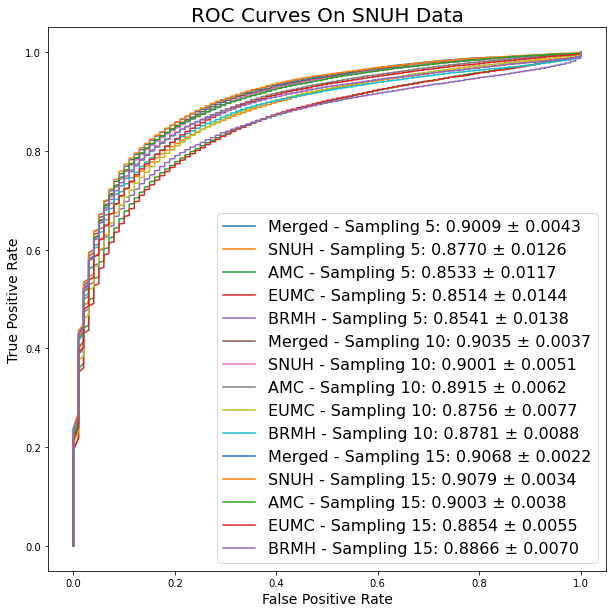

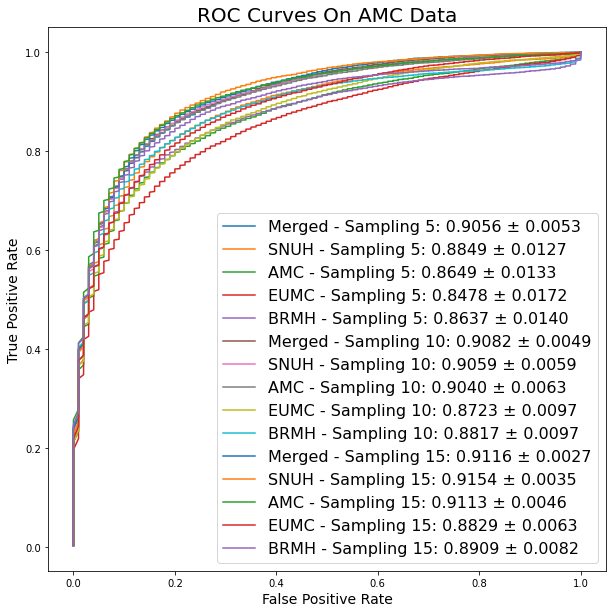

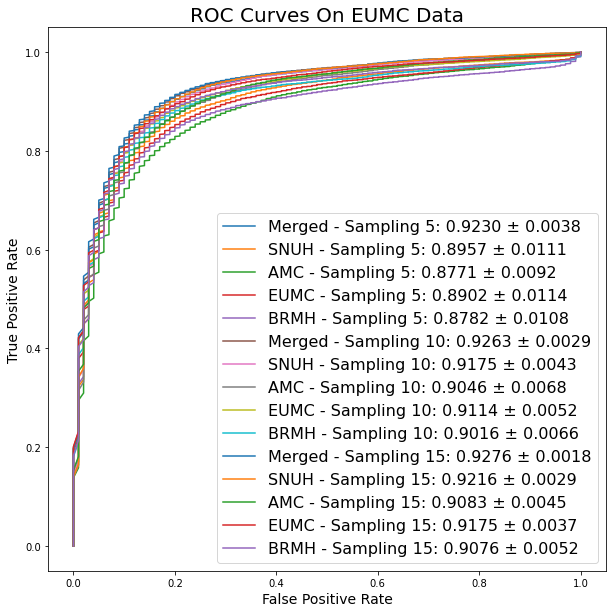

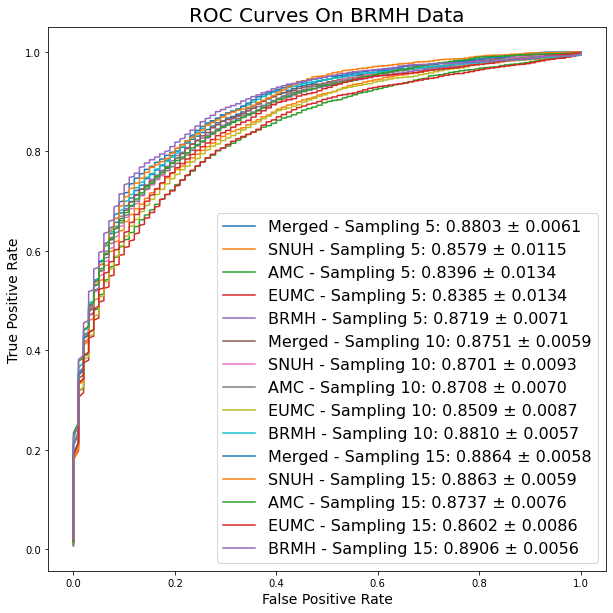

<Figure size 720x720 with 0 Axes>

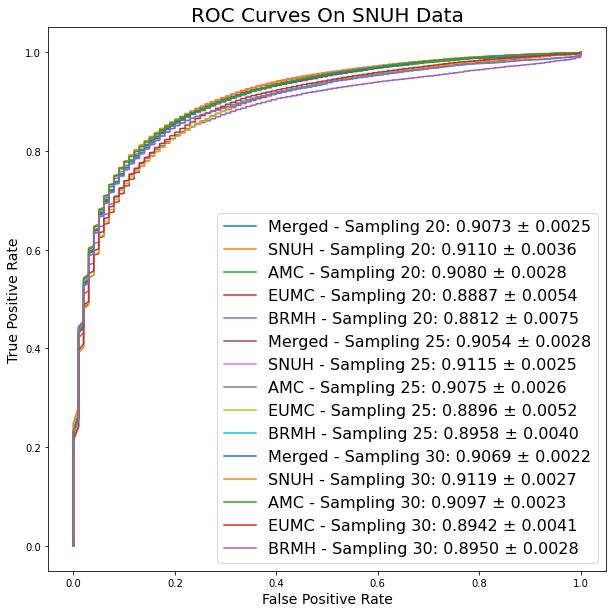

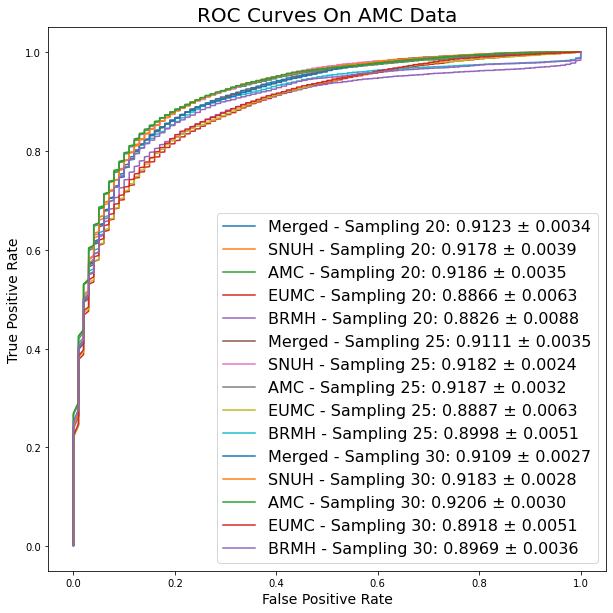

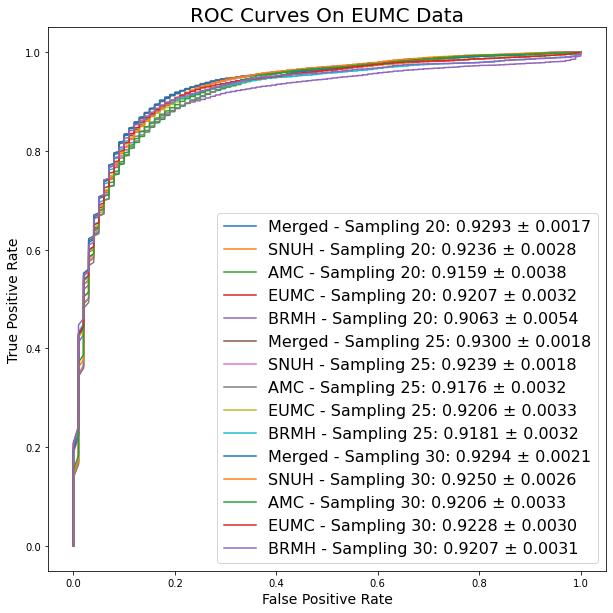

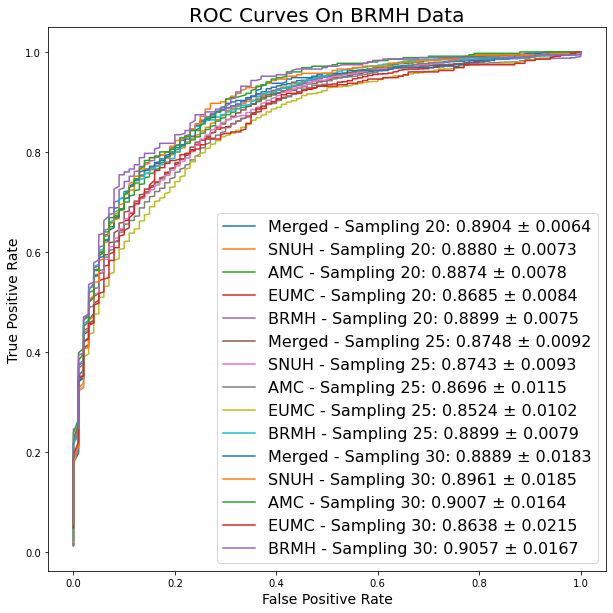

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
sampling_size1 = [5,10,15]
sampling_size2 = [20,25,30]

plt.figure(figsize=(10,10))
plt.title('ROC Curves On SNUH Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_sm{}'.format(k)]:.4f} ± {globals()['aucs_cid_sm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ss{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_ss{}'.format(k)]:.4f} ± {globals()['aucs_cid_ss{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_sa{}'.format(k)]:.4f} ± {globals()['aucs_cid_sa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_se{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_se{}'.format(k)]:.4f} ± {globals()['aucs_cid_se{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_sb{}'.format(k)]:.4f} ± {globals()['aucs_cid_sb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('ROC Curves On AMC Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_am{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_am{}'.format(k)]:.4f} ± {globals()['aucs_cid_am{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_as{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_as{}'.format(k)]:.4f} ± {globals()['aucs_cid_as{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_aa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_aa{}'.format(k)]:.4f} ± {globals()['aucs_cid_aa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ae{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_ae{}'.format(k)]:.4f} ± {globals()['aucs_cid_ae{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ab{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_ab{}'.format(k)]:.4f} ± {globals()['aucs_cid_ab{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('ROC Curves On EUMC Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_em{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_em{}'.format(k)]:.4f} ± {globals()['aucs_cid_em{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_es{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_es{}'.format(k)]:.4f} ± {globals()['aucs_cid_es{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ea{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_ea{}'.format(k)]:.4f} ± {globals()['aucs_cid_ea{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ee{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_ee{}'.format(k)]:.4f} ± {globals()['aucs_cid_ee{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_eb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_eb{}'.format(k)]:.4f} ± {globals()['aucs_cid_eb{}'.format(k)]:.4f}")

# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))
plt.title('ROC Curves On BRMH Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_bm{}'.format(k)]:.4f} ± {globals()['aucs_cid_bm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bs{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_bs{}'.format(k)]:.4f} ± {globals()['aucs_cid_bs{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ba{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_ba{}'.format(k)]:.4f} ± {globals()['aucs_cid_ba{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_be{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_be{}'.format(k)]:.4f} ± {globals()['aucs_cid_be{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_bb{}'.format(k)]:.4f} ± {globals()['aucs_cid_bb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))
plt.title('ROC Curves On SNUH Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_sm{}'.format(k)]:.4f} ± {globals()['aucs_cid_sm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ss{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_ss{}'.format(k)]:.4f} ± {globals()['aucs_cid_ss{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_sa{}'.format(k)]:.4f} ± {globals()['aucs_cid_sa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_se{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_se{}'.format(k)]:.4f} ± {globals()['aucs_cid_se{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_sb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_sb{}'.format(k)]:.4f} ± {globals()['aucs_cid_sb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('ROC Curves On AMC Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_am{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_am{}'.format(k)]:.4f} ± {globals()['aucs_cid_am{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_as{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_as{}'.format(k)]:.4f} ± {globals()['aucs_cid_as{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_aa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_aa{}'.format(k)]:.4f} ± {globals()['aucs_cid_aa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ae{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_ae{}'.format(k)]:.4f} ± {globals()['aucs_cid_ae{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ab{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_ab{}'.format(k)]:.4f} ± {globals()['aucs_cid_ab{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('ROC Curves On EUMC Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_em{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_em{}'.format(k)]:.4f} ± {globals()['aucs_cid_em{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_es{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_es{}'.format(k)]:.4f} ± {globals()['aucs_cid_es{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ea{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_ea{}'.format(k)]:.4f} ± {globals()['aucs_cid_ea{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ee{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_ee{}'.format(k)]:.4f} ± {globals()['aucs_cid_ee{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_eb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_eb{}'.format(k)]:.4f} ± {globals()['aucs_cid_eb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))
plt.title('ROC Curves On BRMH Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['auc_mean_bm{}'.format(k)]:.4f} ± {globals()['aucs_cid_bm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bs{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['auc_mean_bs{}'.format(k)]:.4f} ± {globals()['aucs_cid_bs{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_ba{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['auc_mean_ba{}'.format(k)]:.4f} ± {globals()['aucs_cid_ba{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_be{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['auc_mean_be{}'.format(k)]:.4f} ± {globals()['aucs_cid_be{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auroc_graphs_bb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['auc_mean_bb{}'.format(k)]:.4f} ± {globals()['aucs_cid_bb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))

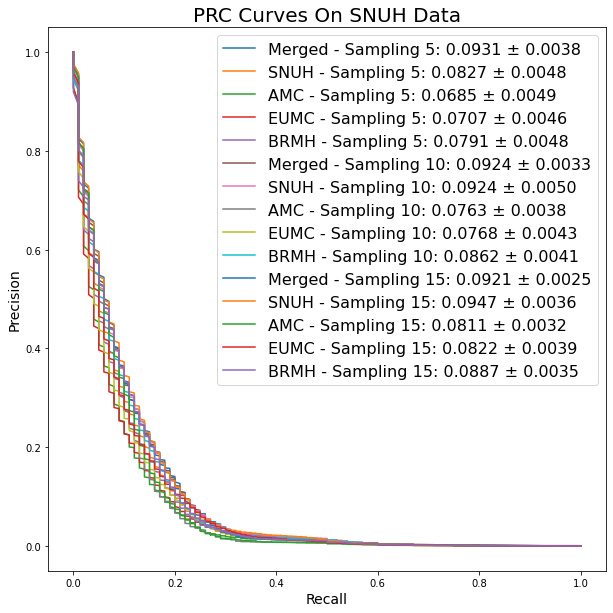

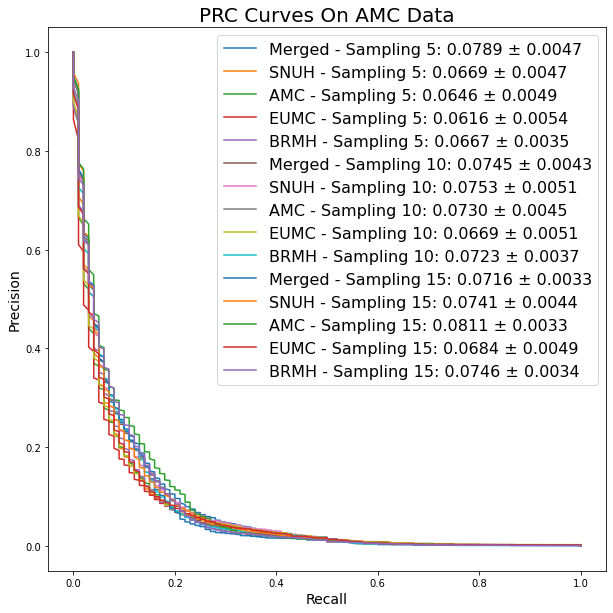

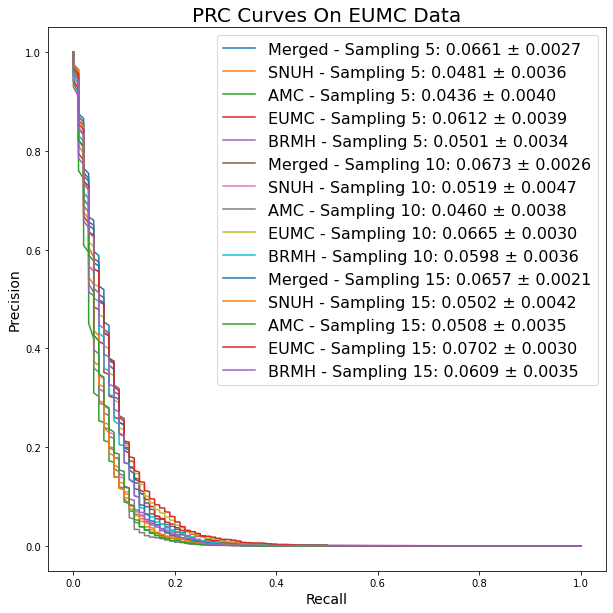

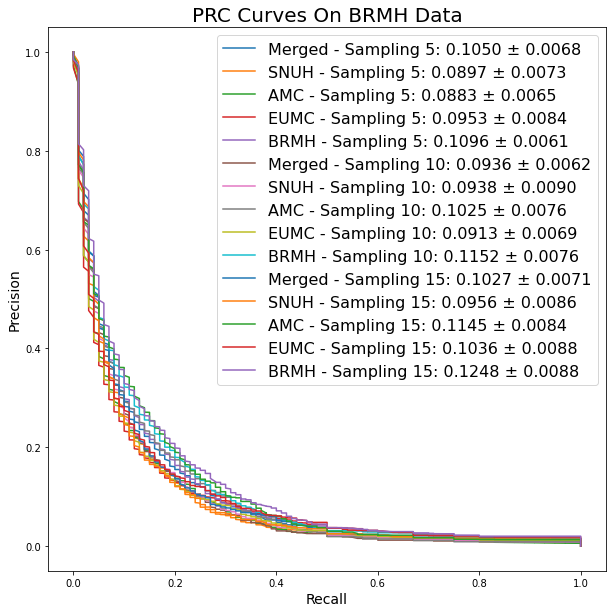

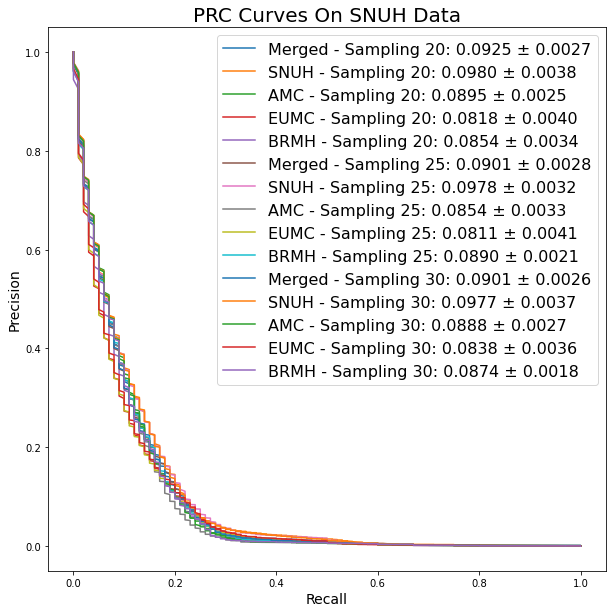

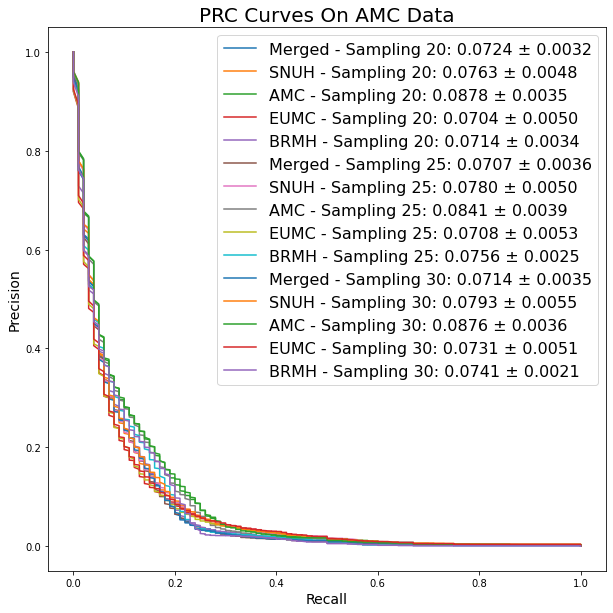

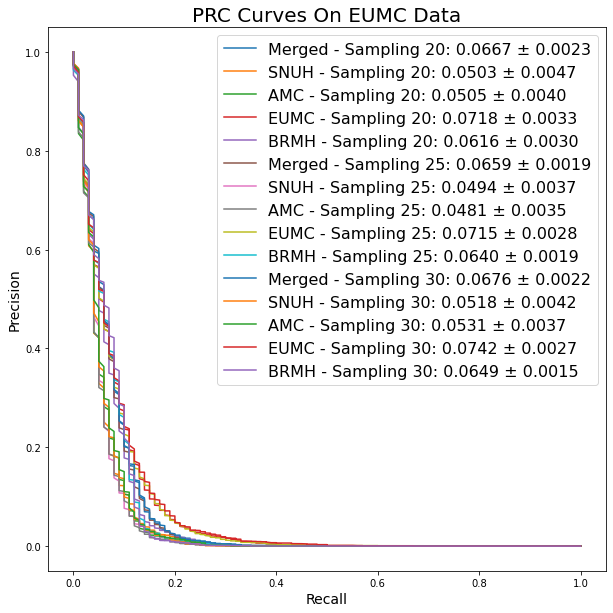

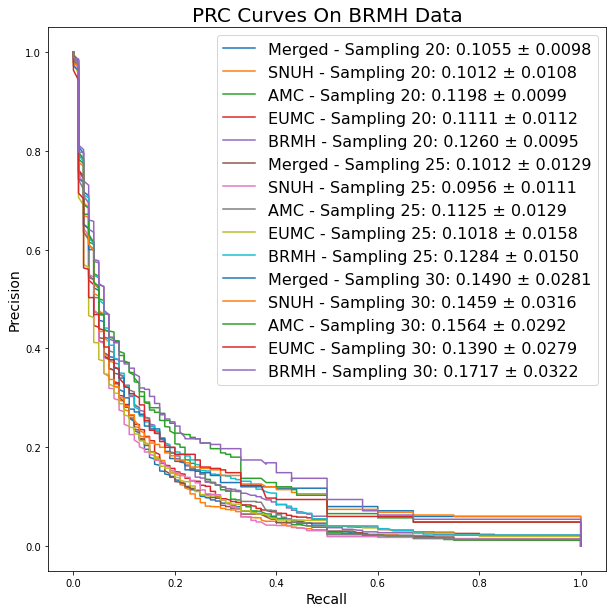

In [ ]:
plt.figure(figsize=(10,10))
plt.title('PRC Curves On SNUH Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_sm{}'.format(k)]:.4f} ± {globals()['prcs_cid_sm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ss{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_ss{}'.format(k)]:.4f} ± {globals()['prcs_cid_ss{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_sa{}'.format(k)]:.4f} ± {globals()['prcs_cid_sa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_se{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_se{}'.format(k)]:.4f} ± {globals()['prcs_cid_se{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_sb{}'.format(k)]:.4f} ± {globals()['prcs_cid_sb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('PRC Curves On AMC Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_am{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_am{}'.format(k)]:.4f} ± {globals()['prcs_cid_am{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_as{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_as{}'.format(k)]:.4f} ± {globals()['prcs_cid_as{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_aa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_aa{}'.format(k)]:.4f} ± {globals()['prcs_cid_aa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ae{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_ae{}'.format(k)]:.4f} ± {globals()['prcs_cid_ae{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ab{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_ab{}'.format(k)]:.4f} ± {globals()['prcs_cid_ab{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('PRC Curves On EUMC Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_em{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_em{}'.format(k)]:.4f} ± {globals()['prcs_cid_em{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_es{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_es{}'.format(k)]:.4f} ± {globals()['prcs_cid_es{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ea{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_ea{}'.format(k)]:.4f} ± {globals()['prcs_cid_ea{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ee{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_ee{}'.format(k)]:.4f} ± {globals()['prcs_cid_ee{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_eb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_eb{}'.format(k)]:.4f} ± {globals()['prcs_cid_eb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))
plt.title('PRC Curves On BRMH Data',fontsize=20)
for k in sampling_size1:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_bm{}'.format(k)]:.4f} ± {globals()['prcs_cid_bm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bs{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_bs{}'.format(k)]:.4f} ± {globals()['prcs_cid_bs{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ba{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_ba{}'.format(k)]:.4f} ± {globals()['prcs_cid_ba{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_be{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_be{}'.format(k)]:.4f} ± {globals()['prcs_cid_be{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_bb{}'.format(k)]:.4f} ± {globals()['prcs_cid_bb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()


plt.figure(figsize=(10,10))
plt.title('PRC Curves On SNUH Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_sm{}'.format(k)]:.4f} ± {globals()['prcs_cid_sm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ss{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_ss{}'.format(k)]:.4f} ± {globals()['prcs_cid_ss{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_sa{}'.format(k)]:.4f} ± {globals()['prcs_cid_sa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_se{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_se{}'.format(k)]:.4f} ± {globals()['prcs_cid_se{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_sb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_sb{}'.format(k)]:.4f} ± {globals()['prcs_cid_sb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('PRC Curves On AMC Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_am{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_am{}'.format(k)]:.4f} ± {globals()['prcs_cid_am{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_as{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_as{}'.format(k)]:.4f} ± {globals()['prcs_cid_as{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_aa{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_aa{}'.format(k)]:.4f} ± {globals()['prcs_cid_aa{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ae{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_ae{}'.format(k)]:.4f} ± {globals()['prcs_cid_ae{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ab{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_ab{}'.format(k)]:.4f} ± {globals()['prcs_cid_ab{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()

plt.figure(figsize=(10,10))
plt.title('PRC Curves On EUMC Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_em{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_em{}'.format(k)]:.4f} ± {globals()['prcs_cid_em{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_es{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_es{}'.format(k)]:.4f} ± {globals()['prcs_cid_es{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ea{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_ea{}'.format(k)]:.4f} ± {globals()['prcs_cid_ea{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ee{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_ee{}'.format(k)]:.4f} ± {globals()['prcs_cid_ee{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_eb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_eb{}'.format(k)]:.4f} ± {globals()['prcs_cid_eb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()
plt.figure(figsize=(10,10))
plt.title('PRC Curves On BRMH Data',fontsize=20)
for k in sampling_size2:
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bm{}'.format(k)]),  label=f"Merged - Sampling {k}: {globals()['prc_mean_bm{}'.format(k)]:.4f} ± {globals()['prcs_cid_bm{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bs{}'.format(k)]),  label=f"SNUH - Sampling {k}: {globals()['prc_mean_bs{}'.format(k)]:.4f} ± {globals()['prcs_cid_bs{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_ba{}'.format(k)]),  label=f"AMC - Sampling {k}: {globals()['prc_mean_ba{}'.format(k)]:.4f} ± {globals()['prcs_cid_ba{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_be{}'.format(k)]),  label=f"EUMC - Sampling {k}: {globals()['prc_mean_be{}'.format(k)]:.4f} ± {globals()['prcs_cid_be{}'.format(k)]:.4f}")
  plt.plot(lins, np.asarray(globals()['auprc_graphs_bb{}'.format(k)]),  label=f"BRMH - Sampling {k}: {globals()['prc_mean_bb{}'.format(k)]:.4f} ± {globals()['prcs_cid_bb{}'.format(k)]:.4f}")
# axis labels
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
# show the legend
plt.legend(fontsize=16)
# show the plot
plt.show()